# Verify the Error Distribution for Ordinary Least Squares
*This notebook verifies the equation for computing the variance of the error distribution for a ordinary least squares prediction*

## Import Dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
np.random.seed(1)

## Set Up Simulation Parameters

In [2]:
X = 2*np.random.random_sample((25, 3))-1
x_prime = 2*np.random.random_sample(3)-1
b = np.array([-2, 1, 0.5])
sigma = 0.5

## Generate a Prediction Error

In [3]:
def generate_prediction_error(X, x_prime, sigma):
    y = np.dot(X, b) + np.random.normal(scale=sigma, size=X.shape[0])
    model = LinearRegression(fit_intercept=False)
    model.fit(X, y)
    y_pred = model.predict([x_prime])[0]
    y_prime = np.dot(x_prime, b) + np.random.normal(scale=sigma)
    return y_prime - y_pred

## Generate Simulation Data

In [4]:
N = 100000
errors = np.array([generate_prediction_error(X, x_prime, sigma) for _ in range(N)])

## Compute Running Mean and Variance

In [5]:
means = []
variances = []
total = 0
total2 = 0
for i, e in enumerate(errors):
    total += e
    total2 += e*e
    means.append(total / (i + 1))
    variances.append(total2 / (i + 1))
means = np.array(means)
variances = np.array(variances)

## Compute Expected Variance

In [6]:
A = np.linalg.inv(np.dot(X.T, X))
expected_error_variance = sigma**2*(1 + np.dot(x_prime, np.dot(A, x_prime)))

## Plot the Running Stats

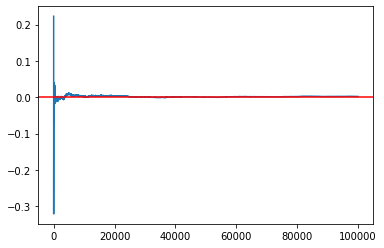

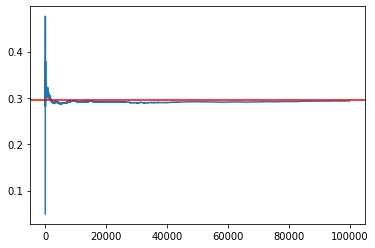

In [7]:
x = np.array(range(len(errors))) + 1
plt.plot(x, means)
plt.axhline(y=0, c='r')
plt.show()
plt.plot(x, variances)
plt.axhline(y=expected_error_variance, c='r')